In [8]:
import pandas as pd
from datetime import datetime

data=pd.read_csv("loan.csv",encoding="gbk")
data.info()
# print(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
用户ID    150000 non-null int64
好坏客户    150000 non-null int64
年龄      150000 non-null int64
负债率     150000 non-null float64
月收入     120269 non-null float64
家属数量    146076 non-null float64
dtypes: float64(3), int64(3)
memory usage: 6.9 MB


In [12]:
# 是不是收入越高的人坏账率越低
data=data.fillna({"月收入":data["月收入"].mean()})
print(data.info())
print(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
用户ID    150000 non-null int64
好坏客户    150000 non-null int64
年龄      150000 non-null int64
负债率     150000 non-null float64
月收入     150000 non-null float64
家属数量    146076 non-null float64
dtypes: float64(3), int64(3)
memory usage: 6.9 MB
None
          用户ID  好坏客户  年龄          负债率           月收入  家属数量
0            1     1  45     0.802982   9120.000000   2.0
1            2     0  40     0.121876   2600.000000   1.0
2            3     0  38     0.085113   3042.000000   0.0
3            4     0  30     0.036050   3300.000000   0.0
4            5     0  49     0.024926  63588.000000   0.0
5            6     0  74     0.375607   3500.000000   1.0
6            7     0  57  5710.000000   6670.221237   0.0
7            8     0  39     0.209940   3500.000000   0.0
8            9     0  27    46.000000   6670.221237   NaN
9           10     0  57     0.606291  23684.000000   2.0
10         

In [11]:
cut_bins=[0,5000,10000,15000,20000,100000]
income_cut=pd.cut(data["月收入"],cut_bins)
print(income_cut)

0           (5000.0, 10000.0]
1               (0.0, 5000.0]
2               (0.0, 5000.0]
3               (0.0, 5000.0]
4         (20000.0, 100000.0]
5               (0.0, 5000.0]
6           (5000.0, 10000.0]
7               (0.0, 5000.0]
8           (5000.0, 10000.0]
9         (20000.0, 100000.0]
10              (0.0, 5000.0]
11          (5000.0, 10000.0]
12         (10000.0, 15000.0]
13         (10000.0, 15000.0]
14                        NaN
15         (10000.0, 15000.0]
16          (5000.0, 10000.0]
17          (5000.0, 10000.0]
18              (0.0, 5000.0]
19              (0.0, 5000.0]
20         (10000.0, 15000.0]
21              (0.0, 5000.0]
22              (0.0, 5000.0]
23          (5000.0, 10000.0]
24              (0.0, 5000.0]
25              (0.0, 5000.0]
26          (5000.0, 10000.0]
27              (0.0, 5000.0]
28              (0.0, 5000.0]
29          (5000.0, 10000.0]
                 ...         
149970     (15000.0, 20000.0]
149971          (0.0, 5000.0]
149972    

月收入
(0, 5000]          0.087543
(5000, 10000]      0.058308
(10000, 15000]     0.041964
(15000, 20000]     0.041811
(20000, 100000]    0.053615
Name: 好坏客户, dtype: float64


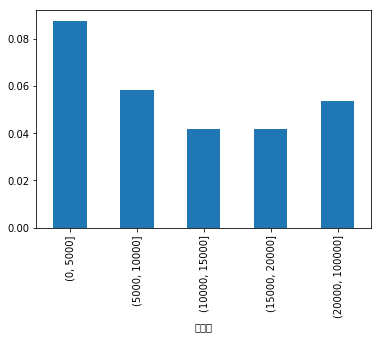

In [15]:
import matplotlib.pyplot as plt

all_income_user=data["好坏客户"].groupby(income_cut).count()
bad_income_user=data["好坏客户"].groupby(income_cut).sum()
bad_rate=bad_income_user/all_income_user
print(bad_rate)

# 绘制月收入与坏账率关系图
bad_rate.plot.bar()

年龄
(-0.109, 18.167]    0.000000
(18.167, 36.333]    0.110124
(36.333, 54.5]      0.081645
(54.5, 72.667]      0.041719
(72.667, 90.833]    0.021585
(90.833, 109.0]     0.022495
Name: 好坏客户, dtype: float64


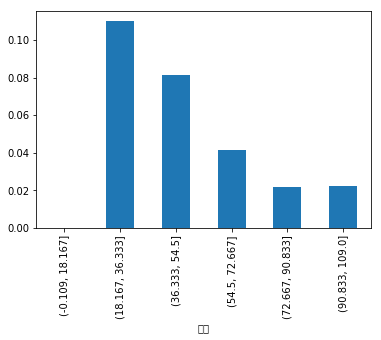

In [21]:
# 年龄和坏账率有什么关系
age_cut=pd.cut(data["年龄"],6)
all_age_user=data["好坏客户"].groupby(age_cut).count()
bad_age_user=data["好坏客户"].groupby(age_cut).sum()
bad_rate=bad_age_user/all_age_user
print(bad_rate)

bad_rate.plot.bar()

In [23]:
# 家庭人口数量和坏账率有什么关系
all_age_user=data.groupby("家属数量")["好坏客户"].count()
bad_age_user=data.groupby("家属数量")["好坏客户"].sum()
bad_rate=bad_age_user/all_age_user
print(bad_rate)

家属数量
0.0     0.058629
1.0     0.073529
2.0     0.081139
3.0     0.088263
4.0     0.103774
5.0     0.091153
6.0     0.151899
7.0     0.098039
8.0     0.083333
9.0     0.000000
10.0    0.000000
13.0    0.000000
20.0    0.000000
Name: 好坏客户, dtype: float64


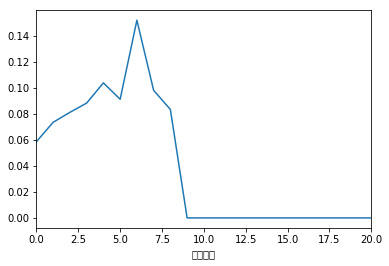

In [25]:
bad_rate.plot()